<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Final_Project_ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)

#**Libraries**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Loading The Data**

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-2-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


##**Dataset Understanding**

In [3]:
#Data types overview
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 **Note**  :  ***V1 - V28***  are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

#**Data preprocessing and feature engineering**

In [5]:
#split the data
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

**The Histogram** shows 25 histograms for variables V1 to V28 and Amount, indicating mostly non-normal distributions with varying skewness.

---



In [6]:
x['Hour'] = (x['Time'] // 3600) % 24
x['Amount_log'] = np.log1p(x['Amount'])

In [7]:
x=x.drop(['Time'],axis=1)

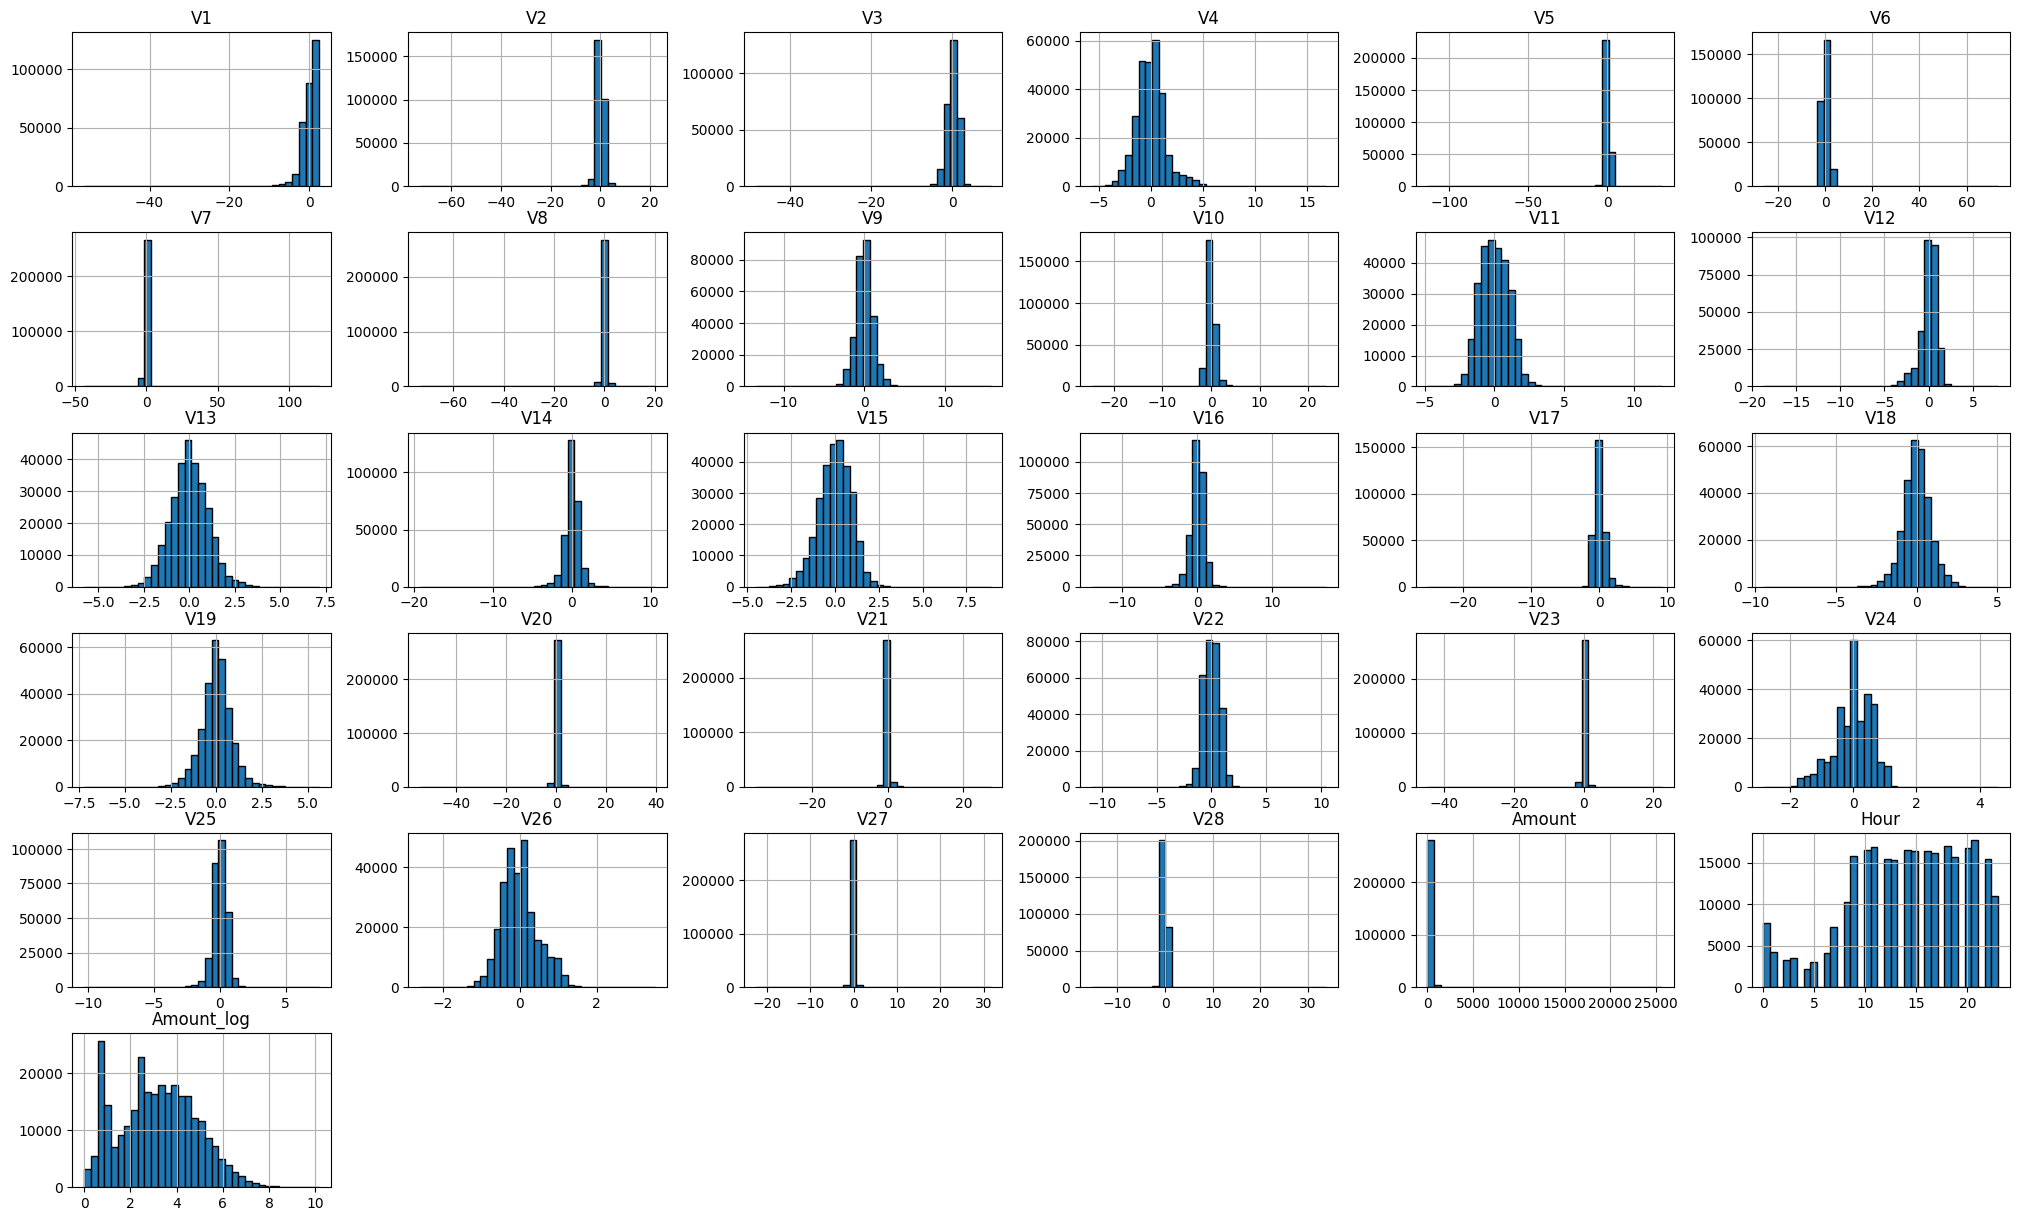

In [8]:
#Visualize feature distribution

x.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

In [9]:


col = ["V1", "V2",'V3','V5', "V6", "V7","V8","V10", "V11", "V15", "V16", "V17", "V21", "V23", "V25", "V27", "V28", "Amount","Hour"]

from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
x[col] = qt.fit_transform(x[col])

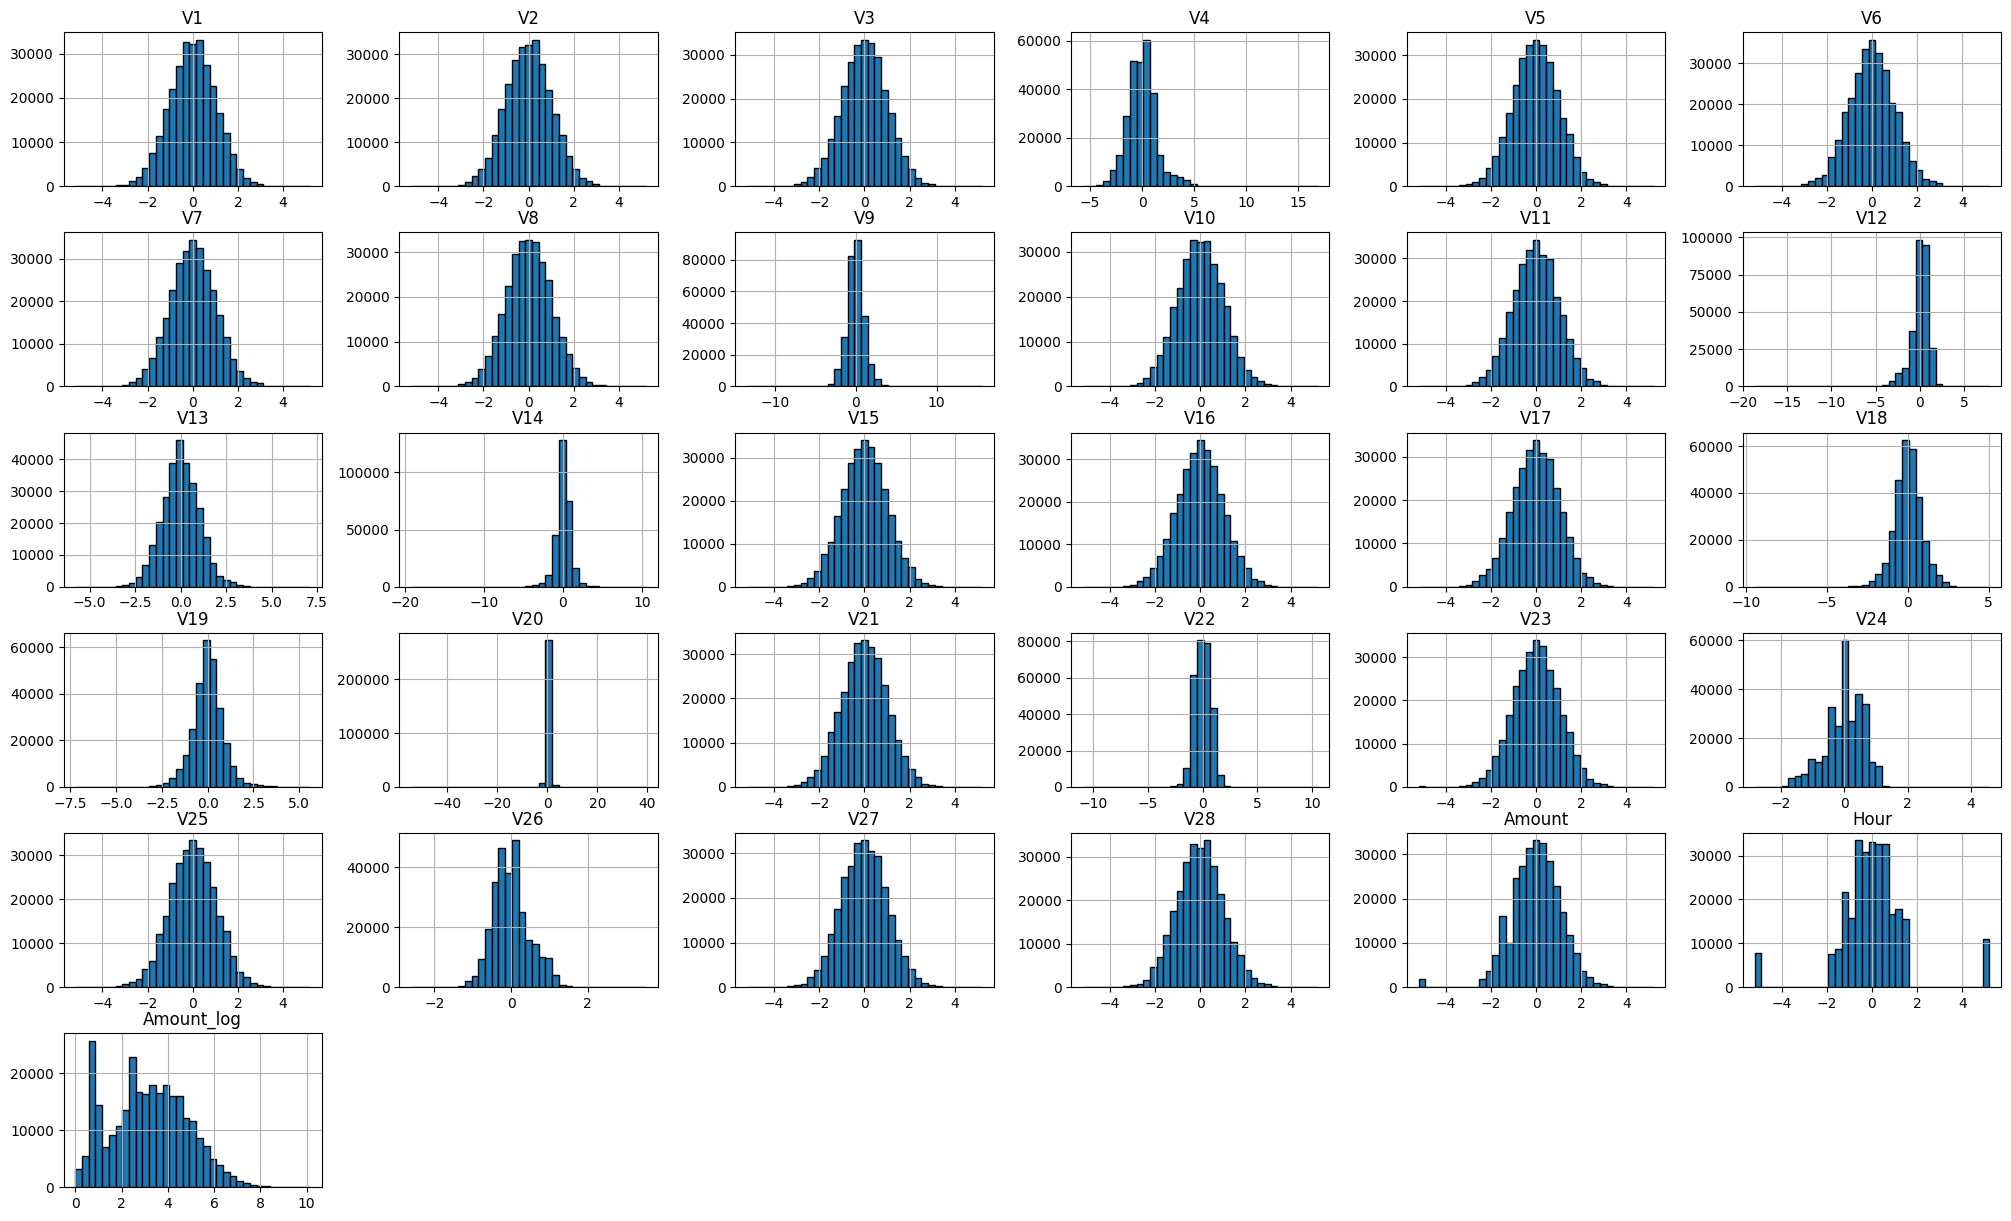

In [10]:
#Visualize feature distribution
x.hist(figsize=(25, 15), bins=35, edgecolor='black')
plt.show()

In [11]:
# We applied a scaler to the new feature and Amount because the V1–V28 features was  already scaled by the  PCA from the original data .
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [12]:
correlation_matrix=x.corr().round(6)


**Heatmap for the correlation between matricies**

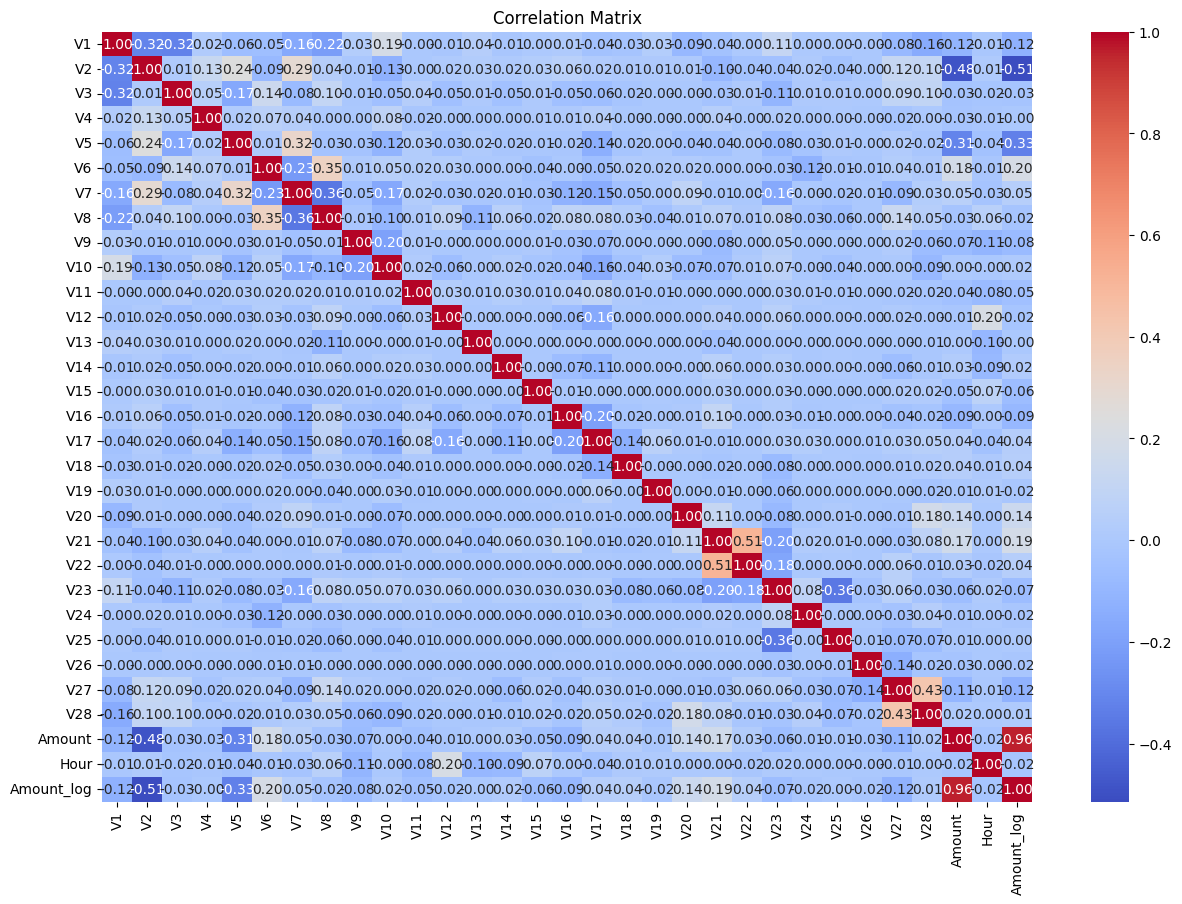

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**The purpose of the created features** :


*   capture potentially non-linear effects on the target variable
*   amplify differences or reveal new patterns that are not
obvious when looking at the features in isolation.



After balancing the data, we obtained a better distribution plot that supports improved generalization.

#Dimensionality reduction (PCA, t-SNE)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
x_pca = pca.fit_transform(x_scaled)

In [15]:
# Analyze explained variance
explained_variance = pca.explained_variance_ratio_.round(3)
explained_variance

array([0.087, 0.063, 0.061, 0.05 , 0.045, 0.044, 0.041, 0.04 , 0.038,
       0.036, 0.035, 0.034, 0.033, 0.033, 0.032, 0.032, 0.032, 0.032,
       0.031, 0.029, 0.027, 0.023, 0.022, 0.019, 0.017, 0.016, 0.014,
       0.013, 0.01 , 0.008, 0.001])

 The first principal component explains the largest amount of variance, about 68%. This means most of the important information in the data is captured by the first component. The remaining components explain less variance.

---

**explained variance**  --> It helps determining how many principal components needed to retain in order to preserve most of the information from the original dataset, while reducing the dimensionality without significant loss of important data.



In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_scaled)

the minimum number of components preserving 90–95% variance: 26


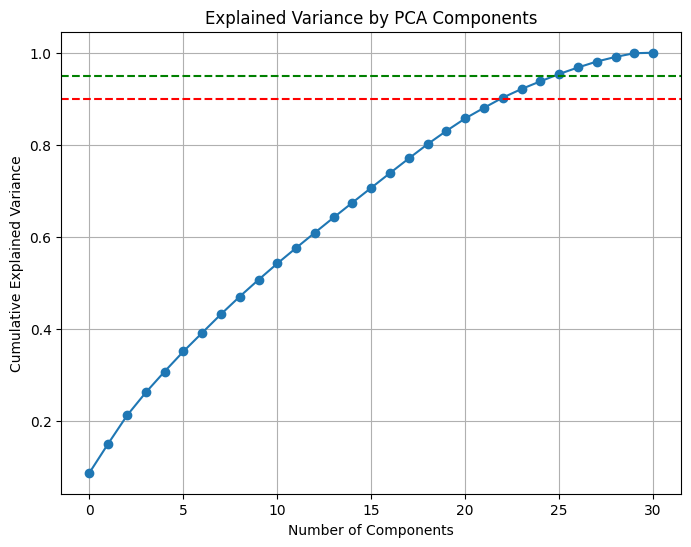

In [17]:
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

To preserve 90-95 % of the total variance in the dataset, 9 principal components are required. This indicates that the original high-dimensional data can be reduced to just 9 components while still retaining most of its essential information and structure.

---





In [18]:
pca_reduced = PCA(n_components=n_components,random_state=42)
x_pca_reduced = pca_reduced.fit_transform(x_scaled)
x_pca_reduced.shape

(284807, 26)

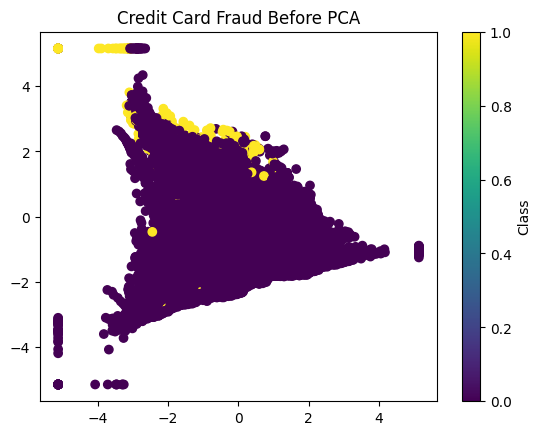

In [19]:
plt.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1], c=y)
plt.title('Credit Card Fraud Before PCA')
plt.colorbar(label='Class')
plt.show()

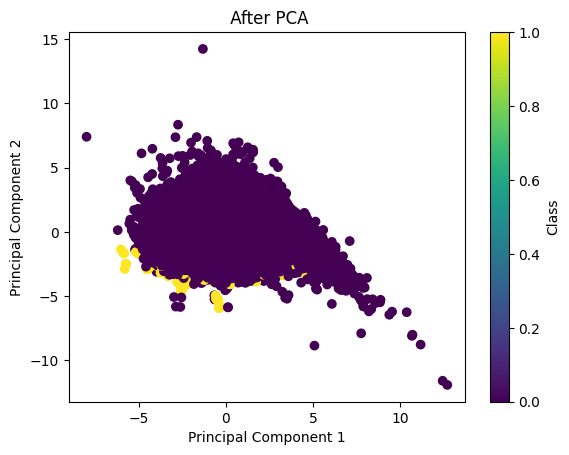

In [20]:
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(' After PCA')
plt.colorbar(label='Class')
plt.show()

**Appearing in the "PCA PLOT" the highest variance component is the first principal component**

##TSNE

**Visualize clusters formed after PCA.**

In [21]:
# !nvidia-smi


In [22]:
# # تثبيت RAPIDS المتوافق مع إصدار CUDA الخاص بك
# # تحقق من https://docs.rapids.ai/install للعثور على الإصدار المتوافق مع إصدار CUDA الخاص بك
# # واستبدل [COMPATIBLE_RAPIDS_VERSION] بالإصدار الصحيح
# !wget https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/rapids-colab.sh
# # Replace [COMPATIBLE_RAPIDS_VERSION] with the actual version found in the RAPIDS install guide
# # Example: !bash rapids-colab.sh 23.08
# !bash rapids-colab.sh [COMPATIBLE_RAPIDS_VERSION_HERE]

# import sys
# sys.path.append('/usr/local/lib/python3.10/site-packages')

In [23]:
from cuml.manifold import TSNE
import cupy as cp

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_pca_reduced)

[2025-05-18 13:49:29.124] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


**2D t-SNE plot before clustering**

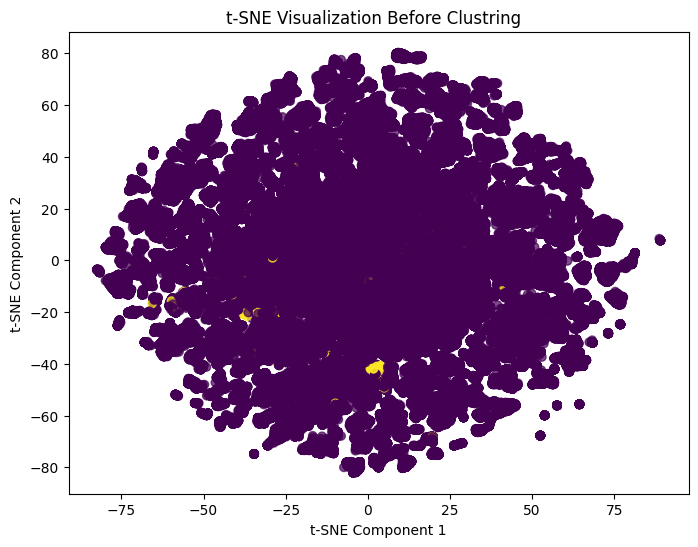

In [24]:


plt.figure(figsize=(8,6))
plt.scatter(x_tsne[:,0], x_tsne[:,1] , c=y ,alpha=0.7)
plt.title('t-SNE Visualization Before Clustring  ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**2D t-SNE plot after clustering**

In [25]:
from sklearn.cluster import KMeans
kmeans_standerd = KMeans(n_clusters=2,n_init=20,init='random',  random_state=42)
clusters = kmeans_standerd.fit_predict(x_pca_reduced)

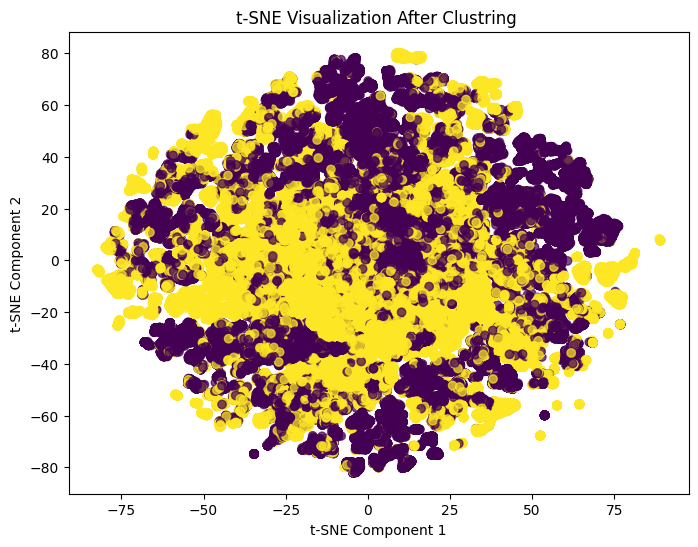

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=clusters , alpha=0.7)
plt.title('t-SNE Visualization After Clustring ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

**According to the T-SNE PLOT it's keeping similar data points close together in the reduced space by maintaining small pairwise distances.**

# Clustering

**Plot Inertia vs k and Silhouette score vs k.**

In [27]:
x_pca_reduced_sample = x_pca_reduced[:1000]


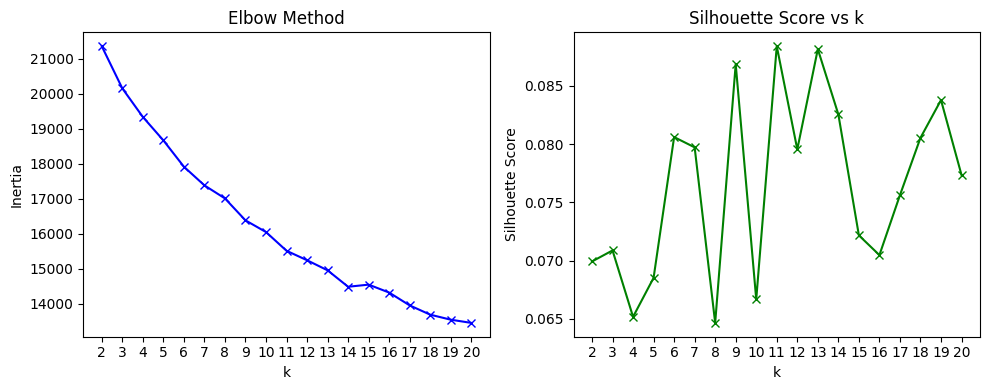

According to the silhouette score the best k is 11 with score 0.0884


In [28]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)
for k in K:
    kmeans1 = KMeans(n_clusters=k,init='random', random_state=42)
    kmeans1.fit(x_pca_reduced_sample)
    kmeans_per_k[k] = kmeans1
    inertias.append(kmeans1.inertia_)
    score = silhouette_score(x_pca_reduced_sample, kmeans1.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

In [29]:
from sklearn.cluster import KMeans
kmeans_standerd = KMeans(n_clusters=13,init="random" , random_state=42).fit(x_pca_reduced_sample)
clusters1 = kmeans_standerd.fit_predict(x_pca_reduced_sample)

**Visualizing Silhouette Scores for K-Means Clustering**

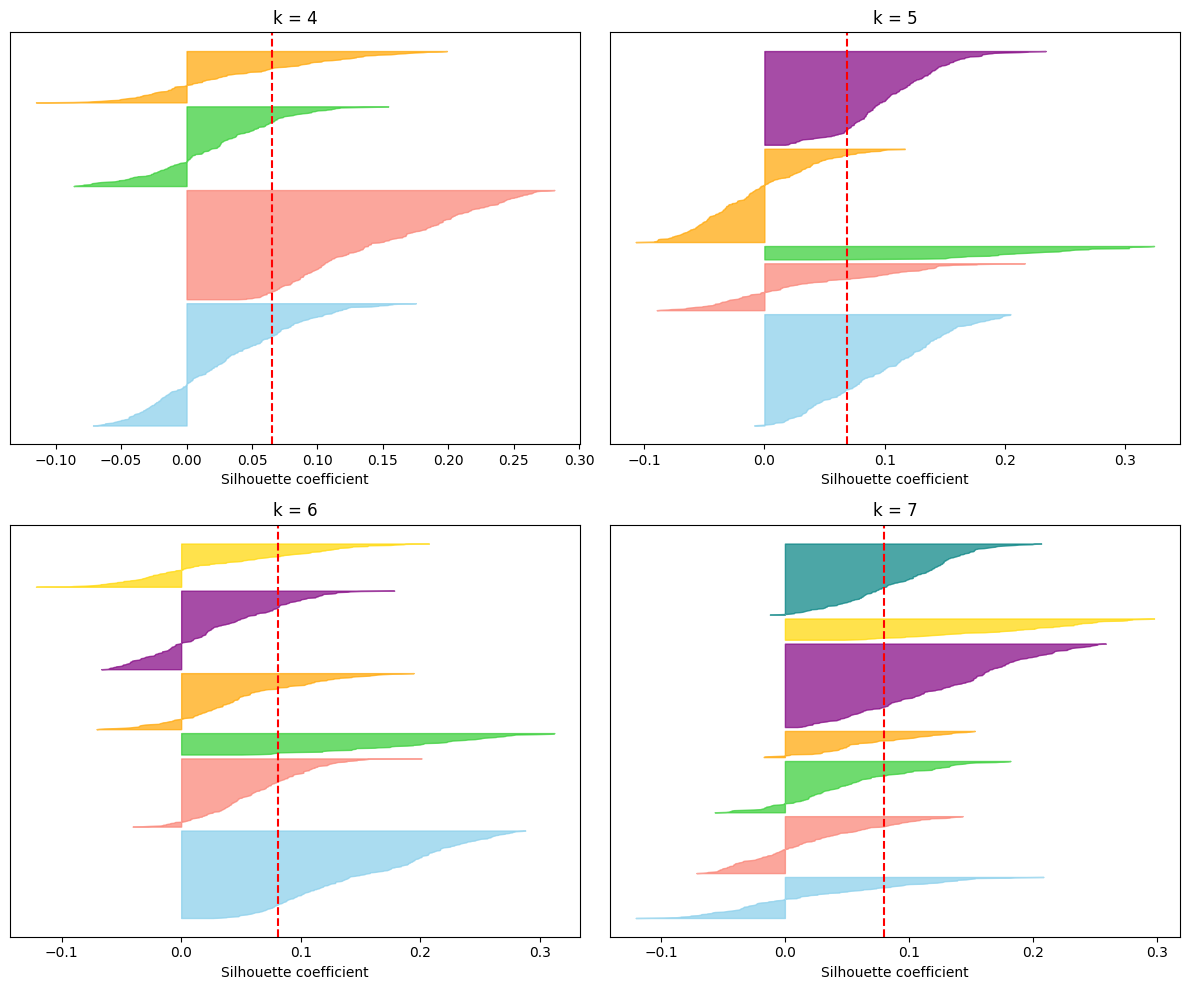

In [30]:
ks = [4,5 , 6, 7]

colors = ['skyblue', 'salmon', 'limegreen', 'orange', 'purple', 'gold', 'teal']

plt.figure(figsize=(12, 10))

for id, k in enumerate(ks, 1):
    labels   = KMeans(n_clusters=k, init = 'random', random_state=42).fit_predict(x_pca_reduced_sample)
    sil_vals = silhouette_samples(x_pca_reduced_sample, labels)

    plt.subplot(2, 2, id)
    y_lower = 10
    for i in range(k):
        cluster_vals = np.sort(sil_vals[labels == i])
        size = len(cluster_vals)
        y_upper = y_lower + size
        color = colors[i % len(colors)]
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    plt.axvline(sil_vals.mean(), color='red', linestyle='--')
    plt.title(f"k = {k}")
    plt.yticks([])
    plt.xlabel("Silhouette coefficient")

plt.tight_layout()
plt.show()

##kmeans ++

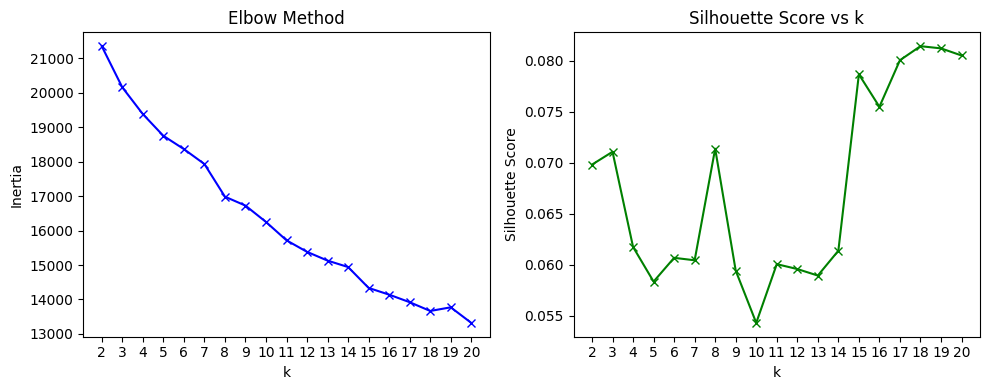

According to the silhouette score the best k is 18 with score 0.0815


In [31]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)
x_pca_reduced_sample = x_pca_reduced[:1000]
for k in K:
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(x_pca_reduced_sample)
    kmeans_per_k[k] = kmeans1
    inertias.append(kmeans1.inertia_)
    score = silhouette_score(x_pca_reduced_sample, kmeans1.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

In [32]:
kmeans_p = KMeans(n_clusters=6,init="k-means++" , random_state=42).fit(x_pca_reduced_sample)
clusters1 = kmeans_p.fit_predict(x_pca_reduced_sample)

**Show how initialization impacts convergence and results**

In [33]:
#1
print("K-Means Iterations:", kmeans_standerd.n_iter_)
print("K-Means++ Iterations:", kmeans_p.n_iter_)
print("------------------------------------------------------------")

#2
print("K-Means Silhouette Score:", silhouette_score(x_pca_reduced_sample, kmeans_standerd.labels_))
print("K-Means++ Silhouette Score:", silhouette_score(x_pca_reduced_sample, kmeans_p.labels_))

K-Means Iterations: 17
K-Means++ Iterations: 21
------------------------------------------------------------
K-Means Silhouette Score: 0.08815154166486752
K-Means++ Silhouette Score: 0.0606923096003539


**Compare standard K-Means standard and K-Means++.**

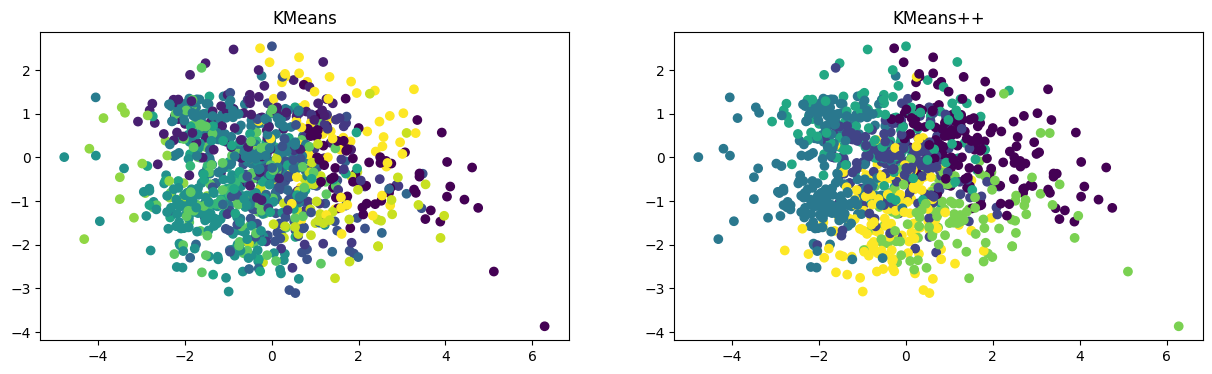

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
plt.show()

##MiniBatchKMeans

In [35]:
from sklearn.cluster import MiniBatchKMeans


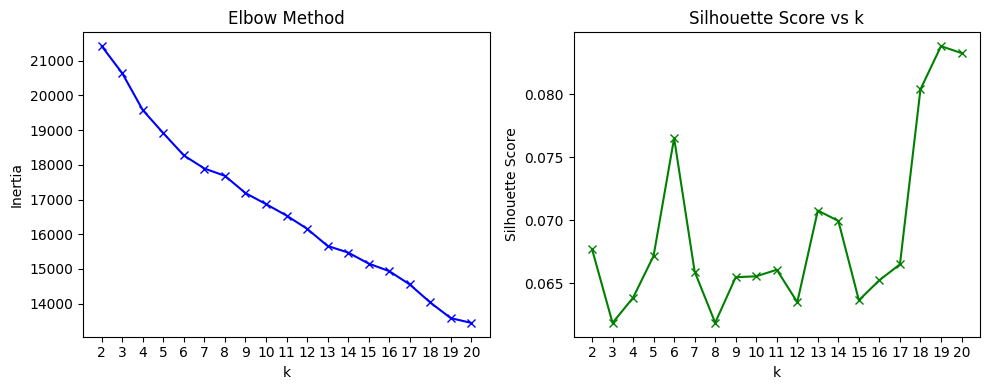

According to the silhouette score the best k is 19 with score 0.0838


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    minikeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minikeans.fit(x_pca_reduced_sample)
    kmeans_per_k[k] = minikeans
    inertias.append(minikeans.inertia_)
    score = silhouette_score(x_pca_reduced_sample, minikeans.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

best_k_index = np.argmax(silhouette_scores)
best_k_value = K[best_k_index]
best_silhouette_score = silhouette_scores[best_k_index]

print(f'According to the silhouette score the best k is {best_k_value} with score {best_silhouette_score:.4f}')

In [37]:
minikmeans=MiniBatchKMeans(n_clusters=6, random_state=42)
minikmeans.fit(x_pca_reduced_sample)

MiniBatchKMeans(n_clusters=6, random_state=42)

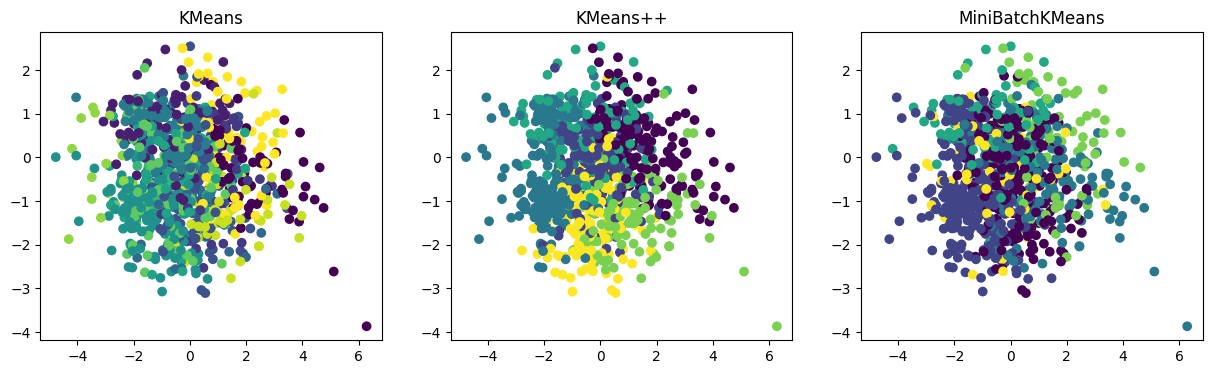

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_pca_reduced_sample[:, 0], x_pca_reduced_sample[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


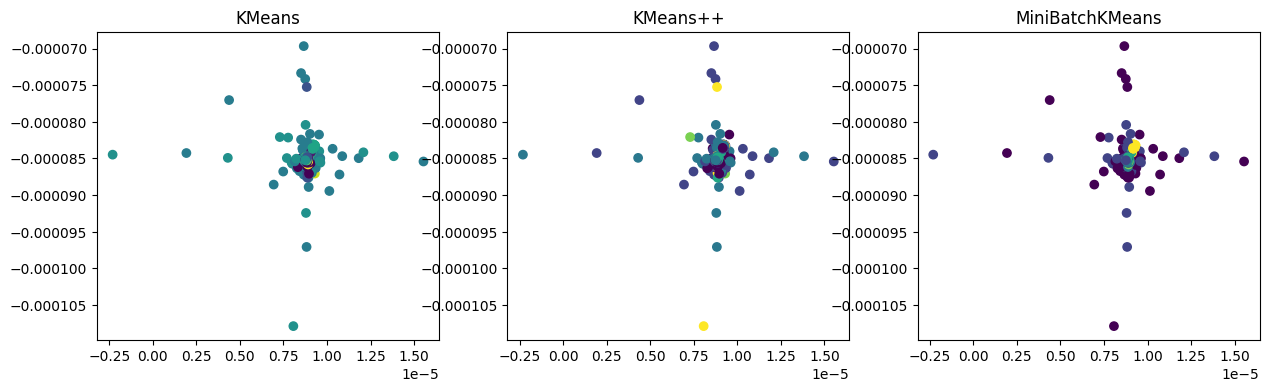

In [41]:
x_tsne = TSNE(random_state=42).fit_transform(x_pca_reduced_sample)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_tsne[:, 0], x_tsne[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_tsne[:, 0], x_tsne[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_tsne[:, 0], x_tsne[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()

**Compare speed, memory usage, and accuracy with standard K-Means.**

In [42]:
!pip install memory_profiler

In [43]:
import time
start_time = time.time()
minikmeans=MiniBatchKMeans(n_clusters=6, random_state=42)
minikmeans.fit(x_pca_reduced_sample)
end_time = time.time()
mini_batch_cluster_labels = minikmeans.labels_
mini_batch_time = end_time-start_time

mini_batch_silhouette = silhouette_score(x_pca_reduced_sample, mini_batch_cluster_labels)

print("Mini-Batch K-Means:")
print(f"  Time taken: {mini_batch_time:.4f} seconds")
print(f"  Silhouette Score: {mini_batch_silhouette}")


start_time = time.time()
kmeans = KMeans(n_clusters=13, init = 'random' , random_state=42)
kmeans.fit(x_pca_reduced_sample)
end_time = time.time()
kmeans_time = end_time - start_time

kmeans_silhouette = silhouette_score(x_pca_reduced_sample, kmeans.labels_)

print("\nStandard K-Means:")
print(f"  Time taken: {kmeans_time:.4f} seconds")
print(f"  Silhouette Score: {kmeans_silhouette}")


print("\nComparison:")
print(f"  Time difference: {abs(mini_batch_time - kmeans_time):.4f} seconds")
print(f"  Silhouette difference: {abs(mini_batch_silhouette - kmeans_silhouette):.4f}")


Mini-Batch K-Means:
  Time taken: 0.0244 seconds
  Silhouette Score: 0.07652474090843064

Standard K-Means:
  Time taken: 0.0934 seconds
  Silhouette Score: 0.08815154166486752

Comparison:
  Time difference: 0.0691 seconds
  Silhouette difference: 0.0116


In [44]:
from memory_profiler import memory_usage

def kmeans():
    kmeans = KMeans(n_clusters=13 , random_state=42)
    kmeans.fit(x_pca_reduced_sample)

def kmeans_minibatch():
    minikmeans=MiniBatchKMeans(n_clusters=6, random_state=42)
    minikmeans.fit(x_pca_reduced_sample)

mem_standerd = memory_usage(kmeans)
mem_mini = memory_usage(kmeans_minibatch)

print("standerd Memory Usage:", max(mem_standerd), "MiB")
print("mini_batch  Memory Usage:", max(mem_mini), "MiB")

standerd Memory Usage: 1687.97265625 MiB
mini_batch  Memory Usage: 1687.984375 MiB


 **Note:**

1.   The memory usage appears similar for both KMeans and MiniBatchKMeans.



2.   This is likely because the dataset is relatively small, and PCA has already reduced its dimensions.





3.   MiniBatchKMeans shows clear memory and speed advantages mainly with large-scale data.



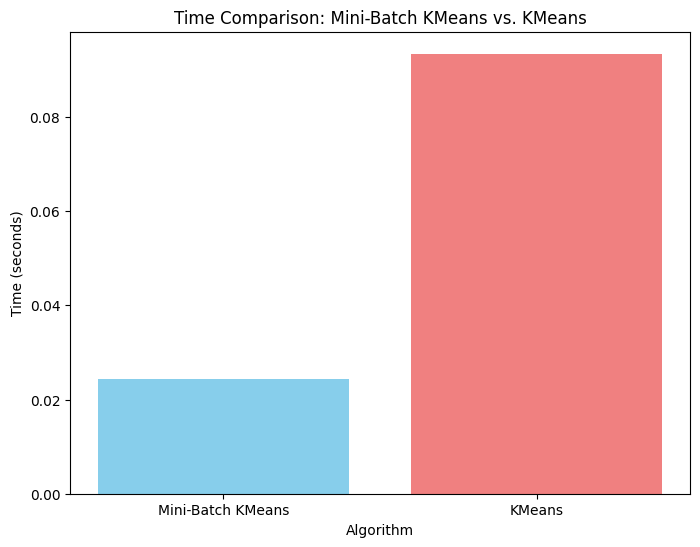

In [45]:
algorithms = ['Mini-Batch KMeans', 'KMeans']
times = [mini_batch_time, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison: Mini-Batch KMeans vs. KMeans')
plt.show()

##DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN( algorithm='kd_tree')
labels = dbscan.fit_predict(x_pca_reduced_sample)
label_counts = pd.Series(labels).value_counts().sort_index()

print(label_counts)

-1    1000
Name: count, dtype: int64


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

def silhouette_dbscan_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters <= 1:
        return -1
    return silhouette_score(X, labels)

dbscan_param_grid = {
    'eps': [5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
    'min_samples': [15, 20, 25, 30, 35, 40, 45, 50]
}

grid_search = GridSearchCV(
    estimator=DBSCAN(),
    param_grid=dbscan_param_grid,
    scoring=silhouette_dbscan_scorer,
    cv=[(np.arange(len(x_pca_reduced_sample)), np.arange(len(x_pca_reduced_sample)))],
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_pca_reduced_sample)

print(" Best parameters found:", grid_search.best_params_)
print(" Best silhouette score:", grid_search.best_score_)

Fitting 1 folds for each of 88 candidates, totalling 88 fits
 Best parameters found: {'eps': 5, 'min_samples': 15}
 Best silhouette score: -1.0


In [51]:
best_dbscan = DBSCAN(eps=5, min_samples=15)
labels = best_dbscan.fit_predict(x_pca_reduced_sample)
label_counts = pd.Series(labels).value_counts().sort_index()
print(label_counts)

-1     59
 0    941
Name: count, dtype: int64


In [52]:
silhouette = silhouette_score(x_pca_reduced_sample, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.2957564745310364


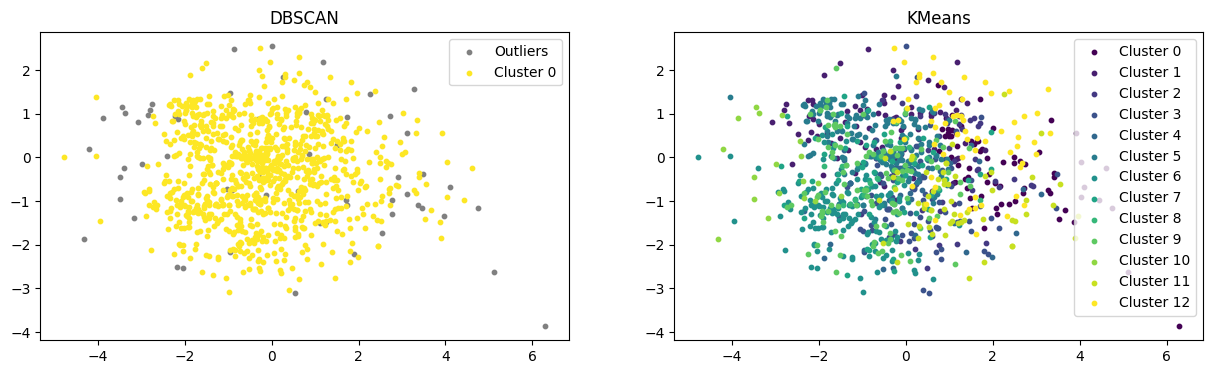

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

unique_db_labels = np.unique(best_dbscan.labels_)
colors_db = plt.cm.viridis(np.linspace(0, 1, len(unique_db_labels)))

for i, label in enumerate(unique_db_labels):
    mask = (best_dbscan.labels_ == label)
    if label == -1:
        axs[0].scatter(x_pca_reduced_sample[mask, 0], x_pca_reduced_sample[mask, 1], c='gray', label='Outliers', s=10)
    else:
        axs[0].scatter(x_pca_reduced_sample[mask, 0], x_pca_reduced_sample[mask, 1], c=[colors_db[i]], label=f'Cluster {label}', s=10)

axs[0].set_title("DBSCAN")
axs[0].legend(loc='best')
unique_km_labels = np.unique(kmeans_standerd.labels_)
colors_km = plt.cm.viridis(np.linspace(0, 1, len(unique_km_labels)))

for i, label in enumerate(unique_km_labels):
    mask = (kmeans_standerd.labels_ == label)
    axs[1].scatter(x_pca_reduced_sample[mask, 0], x_pca_reduced_sample[mask, 1], c=[colors_km[i]], label=f'Cluster {label}', s=10)

axs[1].set_title("KMeans")
axs[1].legend(loc='best')

plt.show()

##Anomaly detection

In [54]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
forest.fit(x_resampled)
forest_predict = forest.predict(x_resampled)
forest_labels = np.where(forest_predict == -1, 1, 0)

In [ ]:
svm = OneClassSVM(gamma='auto', nu=0.1)
svm.fit(x_pca_reduced)
svm_predict = svm.predict(x_pca_reduced)
svm_labels = np.where(svm_predict == -1, 1, 0)

In [ ]:
conf_forest = confusion_matrix(y_resampled, forest_labels)
print("\nIsolation Forest:\n",conf_forest )
conf_svm = confusion_matrix(y_resampled, svm_labels)
print("Confusion Matrix:\n",conf_svm )

In [ ]:
forest_precision = precision_score(y_resampled, forest_labels)
forest_recall = recall_score(y_resampled, forest_labels)
forest_f1 = f1_score(y_resampled, forest_labels)
print(f"Precision: {forest_precision:.4f}")
print(f"Recall: {forest_recall:.4f}")
print(f"F1-Score: {forest_f1:.4f}")
#the original features space of x_resampled, provided more readily available cues for Isolation Forest to accurately identify true positives (fraudulent transactions)

In [ ]:
svm_precision = precision_score(y_resampled, svm_labels)
svm_recall = recall_score(y_resampled, svm_labels)
svm_f1 = f1_score(y_resampled, svm_labels)
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")

In [ ]:
if forest_f1 > svm_f1:
    better_model = "Isolation Forest"
    better_score = forest_f1
    worse_model = "One-Class SVM"
    worse_score = svm_f1
elif svm_f1 > forest_f1:
     better_model = "One-Class SVM"
     better_score = svm_f1
     worse_model = "Isolation Forest"
     worse_score = forest_f1
else:
    better_model = "Neither"
    better_score = forest_f1

print(f"Based on the F1-Score : {better_model} performs better (F1 = {better_score:.4f}) compared to {worse_model} (F1 = {worse_score:.4f}).")
print("Looking at other metrics:")
print(f"Isolation Forest: Precision={forest_precision:.4f}, Recall={forest_recall:.4f}")
print(f"One-Class SVM: Precision={svm_precision:.4f}, Recall={svm_recall:.4f}")

In [ ]:
print("\nReasons for performance difference")
print("- Isolation Forest works by randomly partitioning data points and measuring how 'isolated' they are. It's often effective in high-dimensional spaces and less sensitive to the density of the data compared to density-based methods.")
print("- One-Class SVM tries to find a hyperplane that separates the training data from the origin (or other data). Its performance can be sensitive to the kernel choice and the 'nu' parameter, which controls the trade-off between finding a tight boundary and allowing some training errors.")
print("- Since the models were trained on *resampled* data, they learned the 'normal' pattern from a balanced distribution. This might favor one algorithm over the other depending on how they handle the learned distribution and then detect deviations.")
print("- Isolation Forest might be better at spotting individual outliers even in a balanced dataset, while One-Class SVM might be more focused on defining a compact region for the 'normal' class.")
print("- The performance heavily depends on how well the anomalies (fraud) are truly separable outliers in the feature space used (the PCA reduced features of the resampled data).")

print("\nImportant Consideration:")
print("The evaluation was performed on the *resampled* dataset. A more robust evaluation for anomaly detection would typically involve training the unsupervised models on the *original* non-fraudulent data (or the full dataset with a carefully chosen contamination parameter) and then evaluating their performance on the *original* test set, which maintains the true class imbalance.")
print("The results here reflect performance in identifying anomalies within the modified distribution created by undersampling.")

#Compare clustering performance with and without dimensionality reduction (PCA).

In [62]:
score1 = silhouette_score(x_pca_reduced_sample, kmeans_standerd.labels_)
score = silhouette_score(x_scaled[:1000], kmeans_standerd.labels_)
print("Silhouette Score with PCA:", score1)
print("Silhouette Score without PCA:", score)

Silhouette Score with PCA: 0.08815154166486752
Silhouette Score without PCA: 0.08265411214112457


In [63]:
start_time1 = time.time()
kmeans1 = KMeans(init='random',n_clusters=13, random_state=42)
kmeans1.fit(x_pca_reduced_sample)
end_time1 = time.time()
kmeans_time = end_time1 - start_time1


start_time = time.time()
kmeans = KMeans(init='random',n_clusters=13, random_state=42)
kmeans.fit(x_scaled[:1000])
end_time = time.time()
kmeans_time_without_pca = end_time - start_time


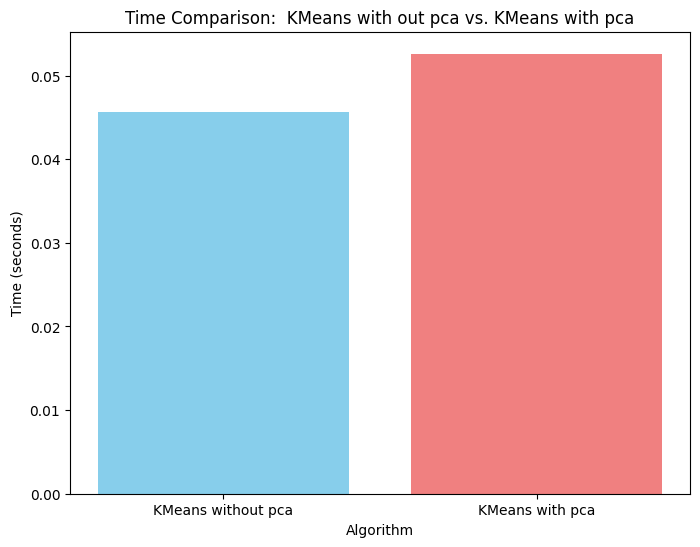

In [64]:
algorithms = [ 'KMeans without pca','KMeans with pca']
times = [kmeans_time_without_pca, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison:  KMeans with out pca vs. KMeans with pca')
plt.show()

# **comparison table**

In [66]:
kmeans_inertia = kmeans_standerd.inertia_
minibatch_inertia = minikmeans.inertia_

kmeans_silhouette_score = silhouette_score(x_pca_reduced_sample, kmeans_standerd.labels_)
minibatch_silhouette_score = silhouette_score(x_pca_reduced_sample, minikmeans.labels_)

comparison_data = {
    'Metric': ['Inertia Value', 'Silhouette Score', 'Execution Time (seconds)', 'Number of Clusters Found'],
    'KMeans': [kmeans_inertia, kmeans_silhouette_score, kmeans_time, 'N/A'],
    'MiniBatchKMeans': [minibatch_inertia, minibatch_silhouette_score, mini_batch_time, 'N/A'],
    'DBSCAN': ['N/A', silhouette, 'N/A', label_counts]
}

comparison_table = pd.DataFrame(comparison_data)

print("Clustering Algorithm Comparison Table:")
print(comparison_table.to_markdown(index=False, floatfmt=".4f"))


Clustering Algorithm Comparison Table:
| Metric                   | KMeans               | MiniBatchKMeans     | DBSCAN                    |
|:-------------------------|:---------------------|:--------------------|:--------------------------|
| Inertia Value            | 14948.684106229623   | 18271.527283996955  | N/A                       |
| Silhouette Score         | 0.08815154166486752  | 0.07652474090843064 | 0.2957564745310364        |
| Execution Time (seconds) | 0.052606821060180664 | 0.02439737319946289 | N/A                       |
| Number of Clusters Found | N/A                  | N/A                 | -1     59                 |
|                          |                      |                     |  0    941                 |
|                          |                      |                     | Name: count, dtype: int64 |
